## Lab 01 Step 00 : Importing Packages

In [72]:
#0.Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt #(plotin histograms in cell #3)
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats

## Lab 01 Step 01 : Choosing subsample

In [2]:
#1.Reading Data and printing head
energydata = pd.read_csv("./energydata_complete.csv")
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [47]:
#2.Creating subsamples
#2.1.Choosing five continous colomns
sample_energydata=energydata[[ 'T2', 'RH_2','T_out' ,'Press_mm_hg','T6']]
#2.2. Randomly choosing rows (50% from the original data. original samples 19,735 Rows)
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)
df_sample_energydata=df_sample_colomn_energydata.sample(frac = 0.5)
#len(df_sample_colomn_energydata.index) #count of rows
#len(df_sample_energydata.index)

## Lab 01 Step 02 Part 01: Non-parametric estimation of PDF in form of histogram 

### ROW AND COLOMN SUBSAMPLE

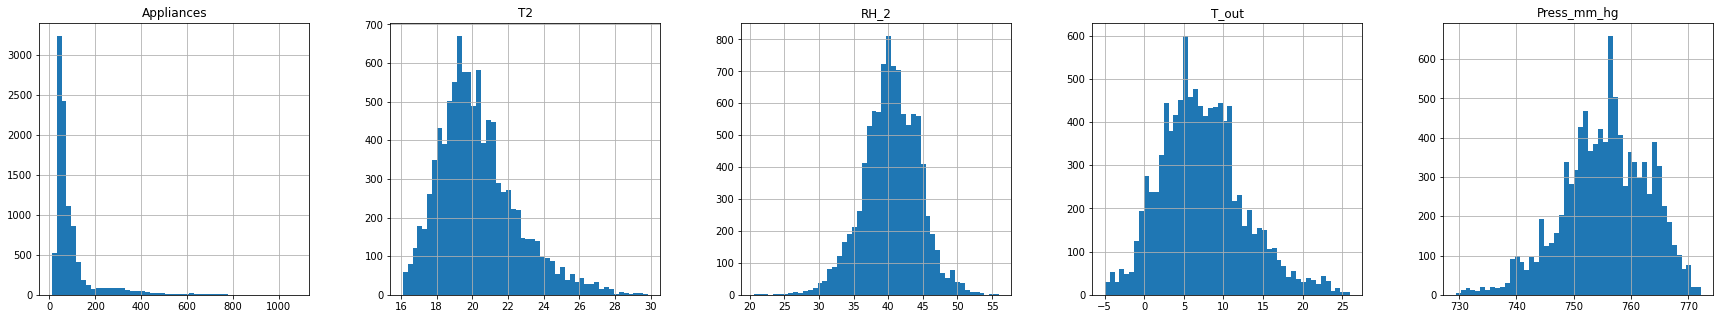

In [4]:
#3.For each variable: non-parametric estimation of PDF in form of histogram and using kernel density function (ploted next to each other)
fig, axes = plt.subplots(len(df_sample_energydata.columns)// 5,5, figsize=(30, 5))
for col, axis in zip(df_sample_energydata.columns, axes):
    df_sample_energydata.hist(column = col, bins = 50, ax=axis)

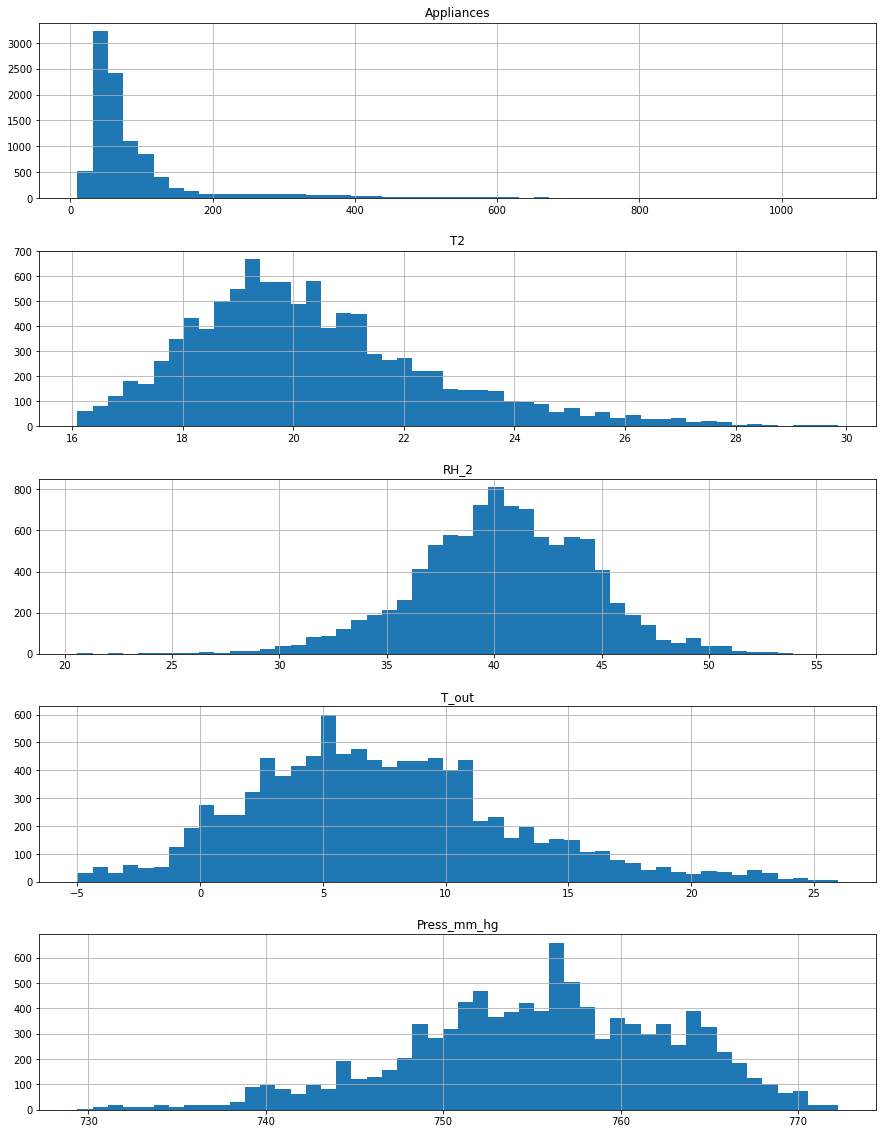

In [5]:
#3.For each variable: non-parametric estimation of PDF in form of histogram and using kernel density function (ploted below each other)
fig, axes = plt.subplots(len(df_sample_energydata.columns), figsize=(15, 20))
for col, axis in zip(df_sample_energydata.columns, axes):
    df_sample_energydata.hist(column = col, bins = 50, ax=axis)

### ONLY COLOMN SUBSAMPLE

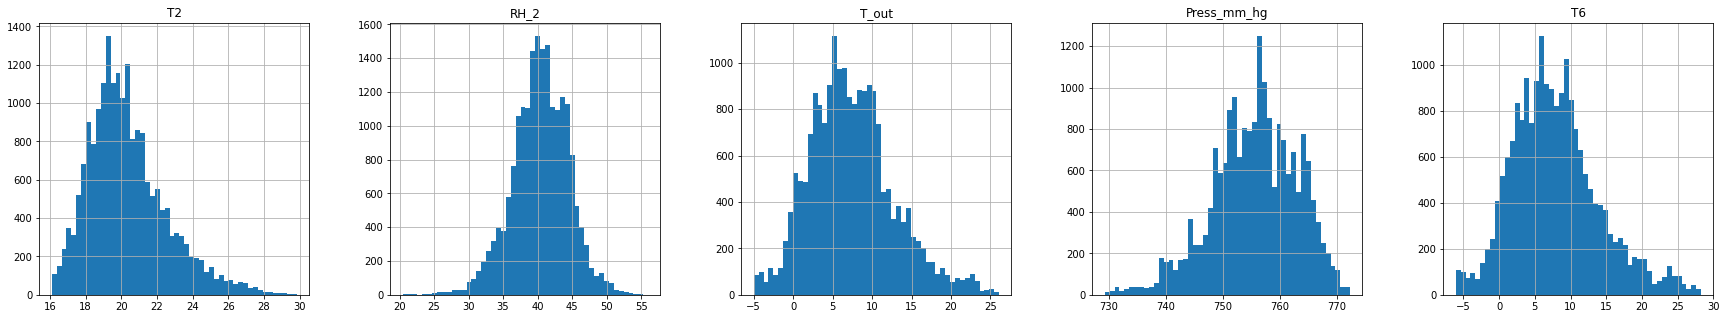

In [49]:
#3.For each variable: non-parametric estimation of PDF in form of histogram and using kernel density function (ploted next to each other)
fig, axes = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(30, 5))
for col, axis in zip(df_sample_colomn_energydata.columns, axes):
    df_sample_colomn_energydata.hist(column = col, bins = 50, ax=axis)

## Lab 01 Step 02 Part 02: Non-parametric estimation of PDF kernel density function (continous RV)

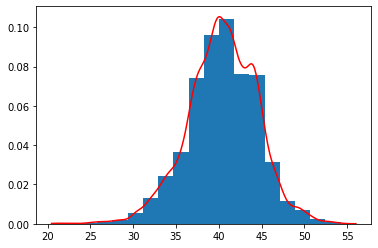

In [25]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=20,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

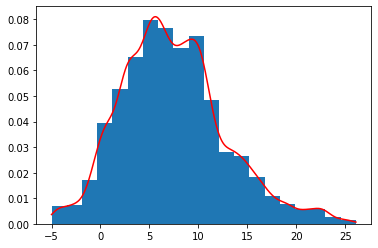

In [27]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=20,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

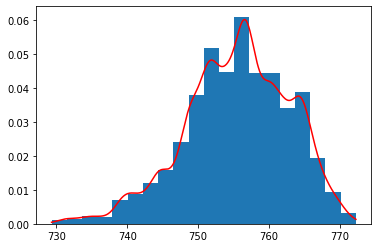

In [28]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[2]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=20,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

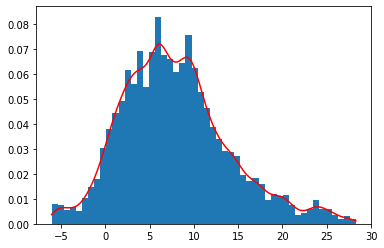

In [50]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[3]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=50,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

(7.910939332397315, 6.0901923047437965)
(7.910939332397315, 6.0901923047437965)


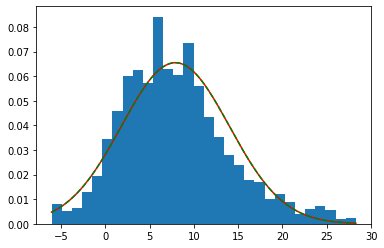

In [68]:
nbins_App=30
col_App=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
max_App=col_App.max()
axis_App=np.linspace(col_App.min(), col_App.max(),500)
x_App = stats.norm  #.rvs(a, b, size=1000, random_state=123)
MM = x_App.fit(col_App,method='MM')
print(MM)
dist_MM_App = x_App.pdf(axis_App, *MM)
MLE = x_App.fit(col_App,method='MLE')
print(MLE)
dist_MLE_App = x_App.pdf(axis_App, *MLE)
fig_App, ax_App = plt.subplots()
ax_App.hist(col_App, nbins_App,density=True, stacked=True)
ax_App.plot(axis_App, dist_MM_App ,'-r', label='exp_MM')
ax_App.plot(axis_App, dist_MLE_App ,'--g' ,label='exp_MLE')

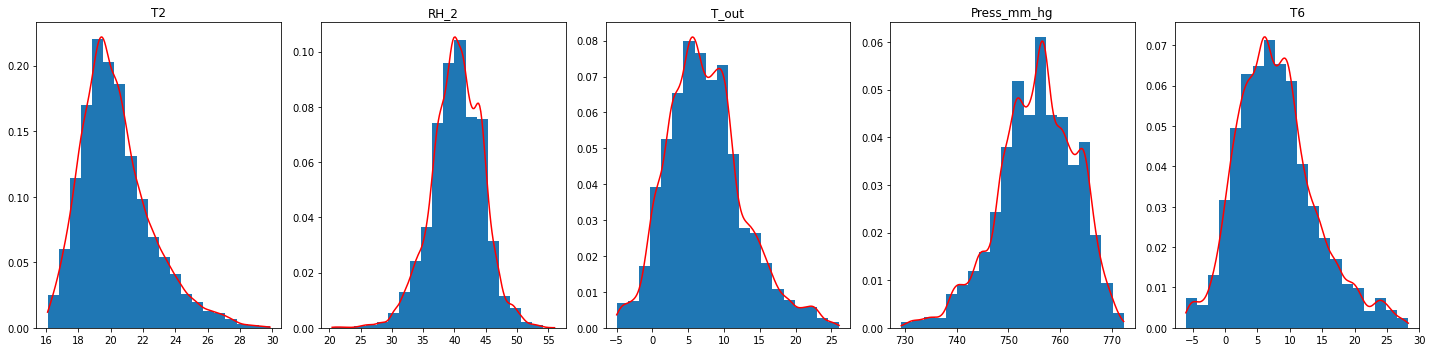

In [51]:
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(20, 5))
i=0
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()
    density = kde.gaussian_kde(col)
    xgrid = np.linspace(col.min(), col.max(), 200)
    ax.hist(col, bins=20,density=True, stacked=True)
    ax.plot(xgrid, density(xgrid), 'r-')
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i!=4) :
        i+=1
plt.tight_layout()

## Lab 01 Step 03 : Estimation of order statistics and representing them as “box with whiskers” plot.

In [11]:
#03.01 function to type the labels of the order statics parameters
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')
    return [median,pc25,pc75,capbottom,captop]

[7.3, 3.626666667, 11.256, -6.065, 22.69666667]

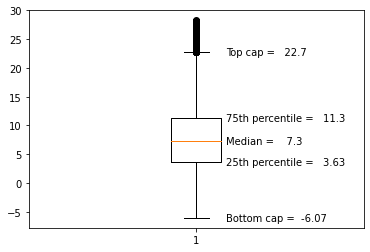

In [53]:
#03.02 plotting box with whiskers for one column
one_col = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
fig, ax = plt.subplots()
# Create the boxplot and store the resulting python dictionary
boxplot=plt.boxplot(one_col)
# Call the function to make labels
make_labels(ax, boxplot)

╒═════════════╤══════════╤═════════╤═════════╤══════════════╤═══════════╕
│             │  Median  │  PC25   │  PC75   │  Cap Bottom  │  Cap Top  │
╞═════════════╪══════════╪═════════╪═════════╪══════════════╪═══════════╡
│ Appliances  │    20    │  18.79  │  21.5   │     16.1     │  25.5625  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T2          │   40.5   │  37.9   │  43.26  │    29.89     │   51.29   │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ RH_2        │   6.92   │  3.67   │  10.4   │      -5      │   20.4    │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T_out       │  756.1   │ 750.933 │ 760.933 │   735.933    │   772.3   │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ Press_mm_hg │   7.3    │ 3.62667 │ 11.256  │    -6.065    │  22.6967  │
╘═════════════╧══════════╧═════════╧═════════╧══════════════╧═══════════╛


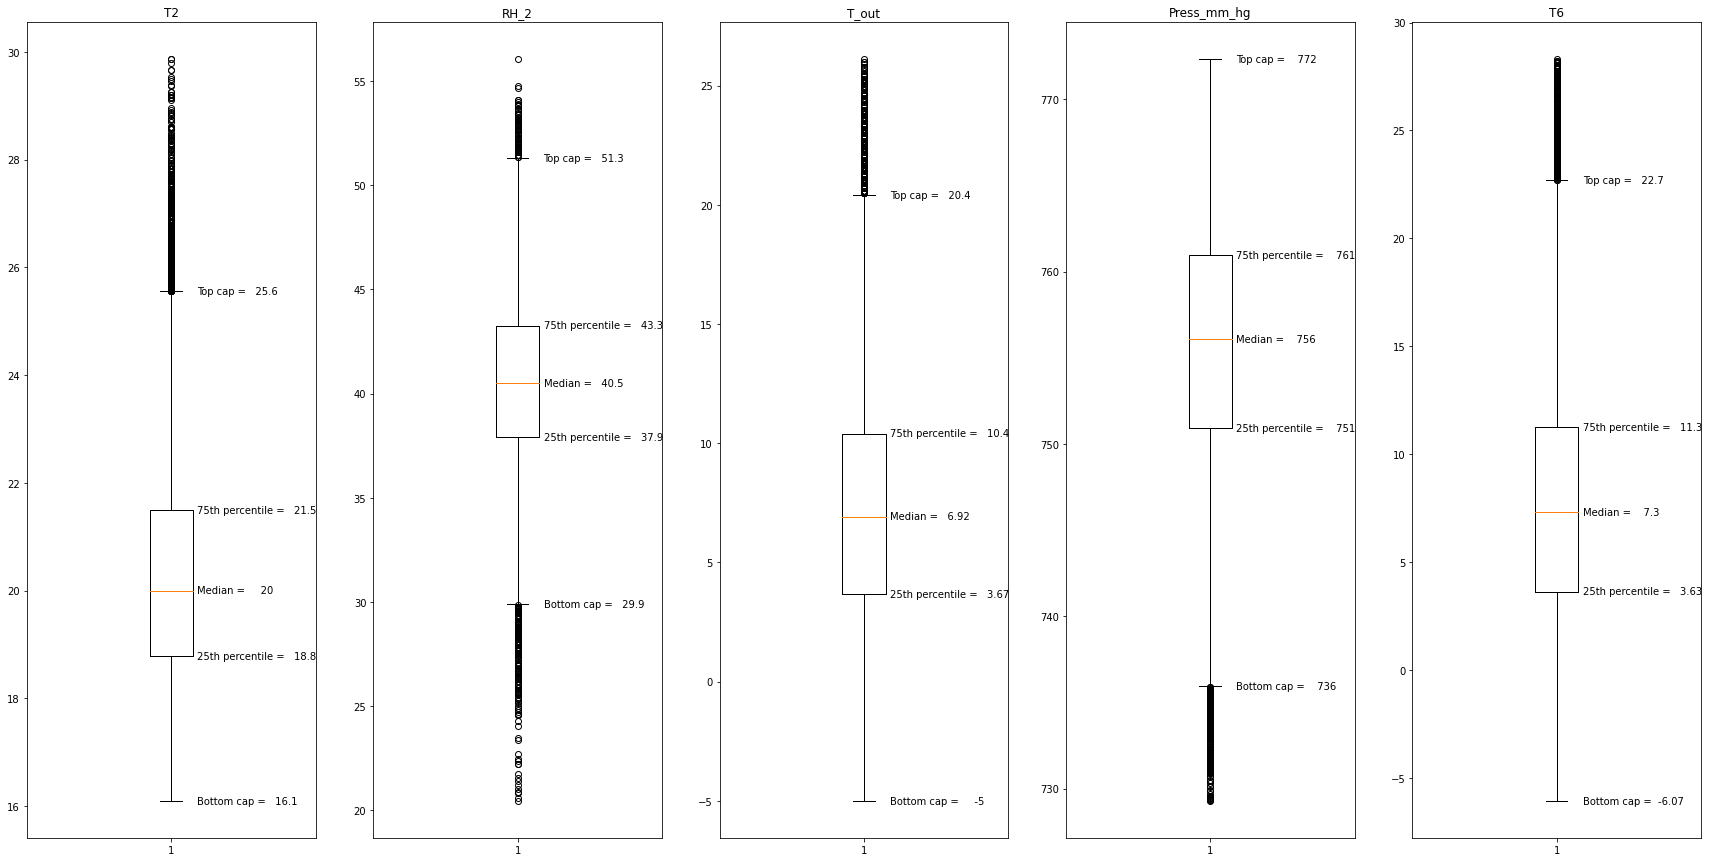

In [52]:
#03.03 plotting box with whiskers for all variables column and printing order statistics 
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)//5,5, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i<4):
        i+=1
    parameters.append(make_labels(ax, bp))
#printing a table with order statistics.
rowIDs=['Appliances','T2','RH_2','T_out','Press_mm_hg']
print(tabulate(parameters, headers=['Median','PC25','PC75','Cap Bottom','Cap Top'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))


## Lab 01 Step 04 : Theoretical distributions that describe the sample on a basis of non-parametric analysis results

All positive.

T2 = Temperature /biased to left/ --> Gamma / Normal (Gaussian)

RH_2 = Humidity /Centered/ --> Normal  (Gaussian)

T_out = Temperature /biased to left/ --> Gamma

Press_mm_hg = Pressure /biased to right/ -->  Normal (Gaussian)

T6 = Temperature outside north. /biased to left/ --> Gamma

## Lab 01 Step 05 : Estimating parameters of chosen distributions using method of maximum likelihood and method of Least sequare error


### Lab 01 Step 05 Variable 01: Temperature: Gamma Distribution

(58.14598000502848, 9.777423418163533, 0.5270585446566403)
(402.93091572521894, -42.27620968715948, 0.20513647915543642)
Ttest_indResult(statistic=221.92132627028568, pvalue=0.0)
Ttest_indResult(statistic=221.92131136699194, pvalue=0.0)


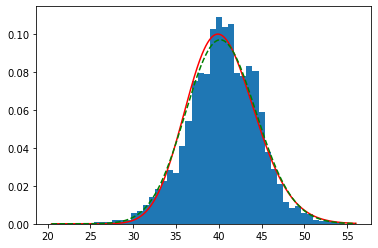

In [59]:
nbins_T2=50
col_T2=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1]].to_numpy()
max_T2=col_T2.max()
axis_T2=np.linspace(col_T2.min(), col_T2.max(),500)
x_T2 = stats.gamma  #.rvs(a, b, size=1000, random_state=123)
MM_T2 = x_T2.fit(col_T2,method='MM')
print(MM_T2)
dist_MM_T2 = x_T2.pdf(axis_T2, *MM_T2)
MLE_T2 = x_T2.fit(col_T2,method='MLE')
print(MLE_T2)
dist_MLE_T2 = x_T2.pdf(axis_T2, *MLE_T2)
fig_T2, ax_T2 = plt.subplots()
ax_T2.hist(col_T2, nbins_T2,density=True, stacked=True)
ax_T2.plot(axis_T2, dist_MM_T2 ,'-r', label='norm_MM')  #* len(col) * smax / nbins
ax_T2.plot(axis_T2, dist_MLE_T2,'--g', label='norm_MLE') #* len(col) * smax / nbins

pValue_MM_T2=stats.ttest_ind(col_T2, dist_MM_T2)
pValue_MLE_T2=stats.ttest_ind(col_T2, dist_MLE_T2)
print(pValue_MM_T2)
print(pValue_MLE_T2)

### Lab 01 Step 05 Variable 02: Humidity: Normal Distribution

(7.412579538890296, 5.318329211299517)
(7.412579538890296, 5.318329211299517)
Ttest_indResult(statistic=31.030728966159902, pvalue=1.4138171595324256e-206)
Ttest_indResult(statistic=31.030728966159902, pvalue=1.4138171595324256e-206)


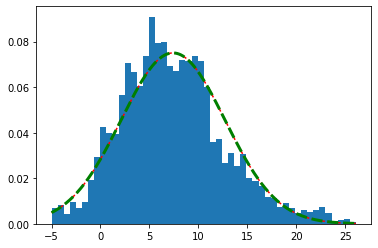

In [61]:
nbins_RH=50
col_RH=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[2]].to_numpy()
max_RH=col_RH.max()
axis_RH=np.linspace(col_RH.min(), col_RH.max(),500)
x_RH = stats.norm  #.rvs(a, b, size=1000, random_state=123)
MM_RH = x_RH.fit(col_RH,method='MM')
print(MM_RH)
dist_MM_RH = x_RH.pdf(axis_RH, *MM_RH)
MLE_RH = x_RH.fit(col_RH,method='MLE')
print(MLE_RH)
dist_MLE_RH = x_RH.pdf(axis_RH, *MLE_RH)
#loc1, scale1,loc2, scale2
fig_RH, ax_RH = plt.subplots()
ax_RH.hist(col_RH, nbins_RH,density=True, stacked=True)
ax_RH.plot(axis_RH, dist_MM_RH ,'--r', label='MM')  #* len(col) * smax / nbins
ax_RH.plot(axis_RH, dist_MLE_RH  ,'--g', lw=3, label='MLE') #* len(col) * smax / nbins

pValue_MM_RH=stats.ttest_ind(col_RH, dist_MM_RH)
pValue_MLE_RH=stats.ttest_ind(col_RH, dist_MLE_RH)
print(pValue_MM_RH)
print(pValue_MLE_RH)

### Lab 01 Step 05 Variable 03: Temperature: Gamma Distribution

(22.64449430091402, 720.3810385942768, 1.5518852838836388)
(344.01899463554025, 614.4398828127207, 0.40992592486639856)
Ttest_indResult(statistic=2283.021467002275, pvalue=0.0)
Ttest_indResult(statistic=2283.0212044923114, pvalue=0.0)


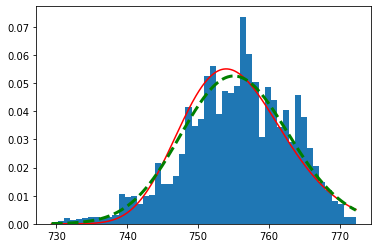

In [70]:
nbins_T_out=50
col_T_out=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[3]].to_numpy()
max_T_out=col_T_out.max()
axis_T_out=np.linspace(col_T_out.min(), col_T_out.max(),500)
x_T_out = stats.gamma  #.rvs(a, b, size=1000, random_state=123)
MM_T_out = x_T_out.fit(col_T_out,method='MM')
print(MM_T_out)
dist_MM_T_out = x_T_out.pdf(axis_T_out, *MM_T_out)
MLE_T_out = x_T_out.fit(col_T_out,method='MLE')
print(MLE_T_out)
dist_MLE_T_out = x_T_out.pdf(axis_T_out, *MLE_T_out)
fig_T_out, ax_T_out = plt.subplots()
ax_T_out.hist(col_T_out, nbins_T_out,density=True, stacked=True)
ax_T_out.plot(axis_T_out, dist_MM_T_out,'-r', label='MM')  
ax_T_out.plot(axis_T_out, dist_MLE_T_out ,'--g', lw=3, label='MLE') 

pValue_MM_T_out=stats.ttest_ind(col_T_out, dist_MM_T_out)
pValue_MLE_T_out=stats.ttest_ind(col_T_out, dist_MLE_T_out)
print(pValue_MM_T_out)
print(pValue_MLE_T_out)

### Lab 01 Step 05 Variable 04: Pressure: Gamma Distribution

(11.20706388432327, -12.477168879305069, 1.8192194157313402)
(13.495448539326741, -14.385799972562484, 1.652167434010908)
Ttest_indResult(statistic=28.938054630411255, pvalue=1.8604403070249691e-180)
Ttest_indResult(statistic=28.938057290355996, pvalue=1.8603026349255948e-180)


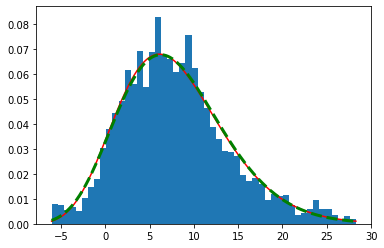

In [67]:
nbins_Press=50
col_Press=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
max_Press=col_Press.max()
axis_Press=np.linspace(col_Press.min(), col_Press.max(),500)
x_Press = stats.gamma  #.rvs(a, b, size=1000, random_state=123)
MM_Press = x_Press.fit(col_Press,method='MM')
print(MM_Press)
dist_MM_Press = x_Press.pdf(axis_Press, *MM_Press)
MLE_Press = x_Press.fit(col_Press,method='MLE')
print(MLE_Press)
dist_MLE_Press = x_Press.pdf(axis_Press, *MLE_Press)
#loc1, scale1,loc2, scale2
fig_Press, ax_Press = plt.subplots()
ax_Press.hist(col_Press, nbins_Press,density=True, stacked=True)
ax_Press.plot(axis_Press, dist_MM_Press ,'-r', label='MM')  
ax_Press.plot(axis_Press, dist_MLE_Press ,'--g', lw=3, label='MLE') 

pValue_MM_Press=stats.ttest_ind(col_Press, dist_MM_Press)
pValue_MLE_Press=stats.ttest_ind(col_Press, dist_MLE_Press)
print(pValue_MM_Press)
print(pValue_MLE_Press)

### Lab 01 Step 05 Variable 05: Temperature outside North: Gamma Distribution

(11.20706388432327, -12.477168879305069, 1.8192194157313402)
(13.495448539326741, -14.385799972562484, 1.652167434010908)
Ttest_indResult(statistic=28.938054630411255, pvalue=1.8604403070249691e-180)
Ttest_indResult(statistic=28.938057290355996, pvalue=1.8603026349255948e-180)


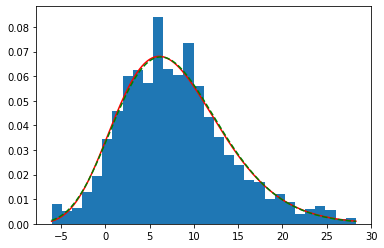

In [80]:
nbins_T6=30
col_T6=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
max_T6=col_T6.max()
axis_T6=np.linspace(col_T6.min(), col_T6.max(),500)
x_T6 = stats.gamma  #.rvs(a, b, size=1000, random_state=123)
MM = x_T6.fit(col_T6,method='MM')
print(MM)
dist_MM_T6 = x_T6.pdf(axis_T6, *MM)
MLE = x_T6.fit(col_T6,method='MLE')
print(MLE)
dist_MLE_T6 = x_T6.pdf(axis_T6, *MLE)
fig_T6, ax_T6 = plt.subplots()
ax_T6.hist(col_T6, nbins_T6,density=True, stacked=True)
ax_T6.plot(axis_T6, dist_MM_T6 ,'-r', label='exp_MM')
ax_T6.plot(axis_T6, dist_MLE_T6 ,'--g' ,label='exp_MLE')

pValue_MM_T6=stats.ttest_ind(col_T6, dist_MM_T6)
pValue_MLE_T6=stats.ttest_ind(col_T6, dist_MLE_T6)
print(pValue_MM_T6)
print(pValue_MLE_T6)

## Lab 01 Step 06 : Validating estimated parameters using QQ biplots.


ValueError: x and y must have same first dimension, but have shapes (19735,) and (500,)

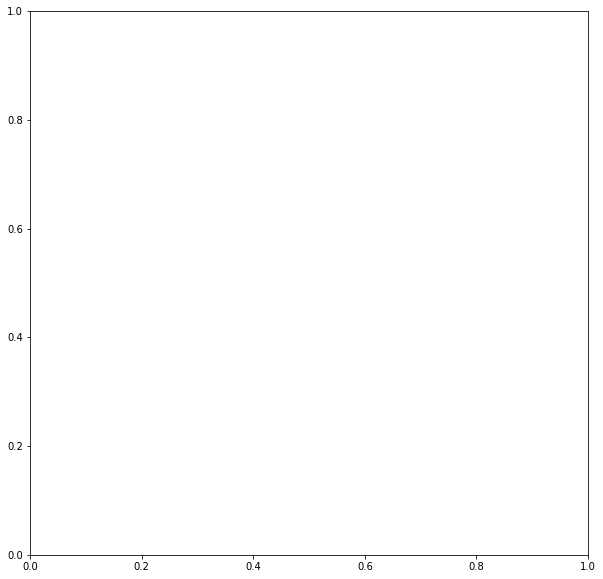

In [78]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = col_T6#np.percentile(df_curr_first['amount'], percs)
qn_lognorm = dist_MLE_T6#scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(axis_T6, axis_T6, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()

## Lab 01 Step 05 : Estimating parameters of chosen distributions using method of maximum likelihood and method of Least sequare error


In [87]:
import numpy as np
import statsmodels.api as sm
import pylab
print (col_T2)
print (dist_MLE_T2)

[44.79       44.7225     44.62666667 ... 42.76857143 43.036
 42.97142857]
[1.06386992e-07 1.18625997e-07 1.32204576e-07 1.47261383e-07
 1.63948536e-07 1.82432831e-07 2.02897055e-07 2.25541406e-07
 2.50585026e-07 2.78267664e-07 3.08851459e-07 3.42622878e-07
 3.79894791e-07 4.21008720e-07 4.66337248e-07 5.16286620e-07
 5.71299539e-07 6.31858163e-07 6.98487335e-07 7.71758037e-07
 8.52291108e-07 9.40761214e-07 1.03790111e-06 1.14450622e-06
 1.26143946e-06 1.38963652e-06 1.53011140e-06 1.68396233e-06
 1.85237817e-06 2.03664513e-06 2.23815400e-06 2.45840778e-06
 2.69902990e-06 2.96177286e-06 3.24852743e-06 3.56133249e-06
 3.90238539e-06 4.27405294e-06 4.67888310e-06 5.11961735e-06
 5.59920373e-06 6.12081067e-06 6.68784158e-06 7.30395030e-06
 7.97305733e-06 8.69936700e-06 9.48738552e-06 1.03419400e-05
 1.12681984e-05 1.22716908e-05 1.33583311e-05 1.45344405e-05
 1.58067717e-05 1.71825344e-05 1.86694220e-05 2.02756396e-05
 2.20099328e-05 2.38816189e-05 2.59006180e-05 2.80774867e-05
 3.04234523

In [88]:
test = np.random.normal(0,1, 1000)
sm.qqplot(col_T2, dist_MLE_T2)
pylab.show()

AttributeError: 'numpy.ndarray' object has no attribute 'name'

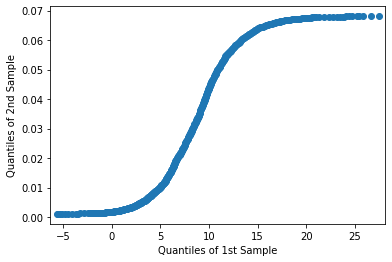

In [95]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = np.random.normal(loc=8.5, scale=2.5, size=37)
y = np.random.normal(loc=8.0, scale=3.0, size=37)
pp_x = sm.ProbPlot(col_Press)
pp_y = sm.ProbPlot(dist_MM_Press)
qqplot_2samples(pp_x, pp_y)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
qn_first= col_T6
qn_second=dist_MM_T6
min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Currency {curr_first}')
plt.ylabel(f'Currency {curr_second}')
plt.xlim([min_qn, 400])
plt.ylim([min_qn, 400])
plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first_list,
    yerr=conf_second_list,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

(97.6949581960983, 102.52229296483618)
(97.6949581960983, 102.52229296483618)


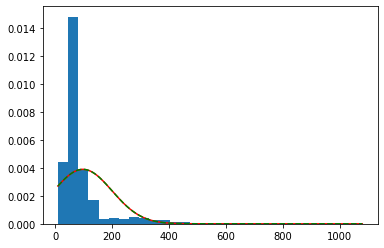

In [ ]:
nbins_App=30
col_App=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
max_App=col_App.max()
axis_App=np.linspace(col_App.min(), col_App.max(),500)
x_App = stats.norm  #.rvs(a, b, size=1000, random_state=123)
MM = x_App.fit(col_App,method='MM')
print(MM)
dist_MM_App = x_App.pdf(axis_App, *MM)
MLE = x_App.fit(col_App,method='MLE')
print(MLE)
dist_MLE_App = x_App.pdf(axis_App, *MLE)
fig_App, ax_App = plt.subplots()
ax_App.hist(col_App, nbins_App,density=True, stacked=True)
ax_App.plot(axis_App, dist_MM_App ,'-r', label='exp_MM')
ax_App.plot(axis_App, dist_MLE_App ,'--g' ,label='exp_MLE')